
# 📈 Projeto de Análise de Vendas da Zara

Este projeto tem como objetivo analisar o desempenho de produtos da Zara com base em uma base de dados de vendas. Através de métricas e visualizações, buscamos responder quais produtos mais vendem, quais mais faturam, e outros insights úteis para a área de negócio.

**Ferramentas utilizadas:** `Python`, `Pandas`, `Plotly`, `Jupyter Notebook`


## **Bibliotecas**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

## 🗂️ Base De Dados

In [3]:
df = pd.read_csv('zara.csv', sep=';')
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN


## Analisando a Base de Dados

### Duplicação

In [4]:
df.duplicated().sum()

0

### Colunas

In [5]:
df.columns

Index(['Product ID', 'Product Position', 'Promotion', 'Product Category',
       'Seasonal', 'Sales Volume', 'brand', 'url', 'sku', 'name',
       'description', 'price', 'currency', 'scraped_at', 'terms', 'section'],
      dtype='object')

### Linhas e Colunas

In [6]:
df.shape

(252, 16)

### Células Nulas

In [7]:
df.isnull().sum().sum()

3

## 🎯 KPIs Gerais

## 💵 Faturamento Total

In [8]:
#criando a coluna de faturamento por produto
df['Total price'] = df['Sales Volume'] * df['price']
df.head()

,Product ID,Product Position,Promotion,Product Category,Seasonal,Sales Volume,brand,url,sku,name,description,price,currency,scraped_at,terms,section,Total price
0,185102,Aisle,No,Clothing,No,2823,Zara,https://www.zara.com/us/en/basic-puffer-jacket...,272145190-250-2,BASIC PUFFER JACKET,Puffer jacket made of tear-resistant ripstop f...,19.99,USD,2024-02-19T08:50:05.654618,jackets,MAN,56431.77
1,188771,Aisle,No,Clothing,No,654,Zara,https://www.zara.com/us/en/tuxedo-jacket-p0889...,324052738-800-46,TUXEDO JACKET,Straight fit blazer. Pointed lapel collar and ...,169.00,USD,2024-02-19T08:50:06.590930,jackets,MAN,110526.00
2,180176,End-cap,Yes,Clothing,Yes,2220,Zara,https://www.zara.com/us/en/slim-fit-suit-jacke...,335342680-800-44,SLIM FIT SUIT JACKET,Slim fit jacket. Notched lapel collar. Long sl...,129.00,USD,2024-02-19T08:50:07.301419,jackets,MAN,286380.00
3,112917,Aisle,Yes,Clothing,Yes,1568,Zara,https://www.zara.com/us/en/stretch-suit-jacket...,328303236-420-44,STRETCH SUIT JACKET,Slim fit jacket made of viscose blend fabric. ...,129.00,USD,2024-02-19T08:50:07.882922,jackets,MAN,202272.00
4,192936,End-cap,No,Clothing,Yes,2942,Zara,https://www.zara.com/us/en/double-faced-jacket...,312368260-800-2,DOUBLE FACED JACKET,Jacket made of faux leather faux shearling wit...,139.00,USD,2024-02-19T08:50:08.453847,jackets,MAN,408938.00


In [9]:
#realizando soma do faturamento de cada produto
faturamento_total = df['Total price'].sum()
print(f'Faturamento total: U$ {faturamento_total:,.2f}')

Faturamento total: U$ 38,988,476.48


## 🛒 Total de vendas

In [10]:
#obtendo a soma total das vendas
total_vendas = df['Sales Volume'].sum()
print(f'Total de vendas: {total_vendas:,.0f}'.replace(',','.'))

Total de vendas: 459.573


## 💳 Ticket Médio

In [11]:
#realizando a média do faturamento total
ticket_medio = df['Total price'].mean()
print(f'Ticket médio: U$ {ticket_medio:,.2f}')

Ticket médio: U$ 154,716.18


## Tipos diferentes de produtos

In [12]:
#obtendo o número de produtos
tipos_produtos = df['name'].nunique()
print(f'Tipos de produtos: {tipos_produtos}')

Tipos de produtos: 194


## Categorias

In [13]:
#obtendo o número de categorias
categorias = df['Product Category'].nunique()
print(f'Categorias: {categorias}')

Categorias: 1


In [14]:
#obtendo o nome das categorias
nomes_categorias = df['Product Category'].unique()
print(f'Categorias: {nomes_categorias}')

Categorias: ['Clothing']


## Subcategorias

In [15]:
#obtendo o número de subcategorias
subcategorias = df['terms'].nunique()
print(f'Subcategorias: {subcategorias}')

Subcategorias: 5


In [16]:
#obtendo o nome das subcategorias
nomes_subcategorias = df['terms'].unique()
print(f'Subcategorias: {nomes_subcategorias}')

Subcategorias: ['jackets' 'shoes' 'sweaters' 'jeans' 't-shirts']


## 🔝 Produto top 1 (faturamento)

In [17]:
#obtendo produto n°1 em faturamento
produto_maior_faturamento = df[['name', 'Total price']].groupby('name').sum().sort_values('Total price', ascending=False).head(1)

produto_maior_faturamento_format = produto_maior_faturamento.copy()

#formatando padrão monetário
produto_maior_faturamento_format['Total price'] = produto_maior_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(produto_maior_faturamento_format)

,Total price
name,
CONTRASTING PATCHES BOMBER JACKET,"$889,308.00"


## 🔝 Produto top 1 (vendas)

In [18]:
#obtendo produto n°1 em vendas
produto_maior_vendas = df[['name', 'Sales Volume']].groupby('name').sum().sort_values('Sales Volume', ascending=False).head(1)
#formatando padrão numérico
produto_maior_vendas['Sales Volume'] = produto_maior_vendas['Sales Volume'].apply(lambda x: f'{x:,.2f}')
display(produto_maior_vendas)

,Sales Volume
name,
PLAID OVERSHIRT,"10,910.00"


## Top produtos com maior faturamento

In [19]:
top_produtos_faturamento = df[['name', 'Total price']].groupby('name').sum().sort_values('Total price', ascending=False).head(5)
top_produtos_formatado = top_produtos_faturamento.copy()
top_produtos_formatado['Total price'] = top_produtos_formatado['Total price'].apply(lambda x: f'${x:,.2f}')
display(top_produtos_formatado)

,Total price
name,
CONTRASTING PATCHES BOMBER JACKET,"$889,308.00"
SUIT JACKET IN 100% LINEN,"$816,675.00"
FAUX LEATHER BOMBER JACKET,"$798,852.60"
PLAID OVERSHIRT,"$695,369.00"
RIB COLLAR JACKET,"$685,883.00"


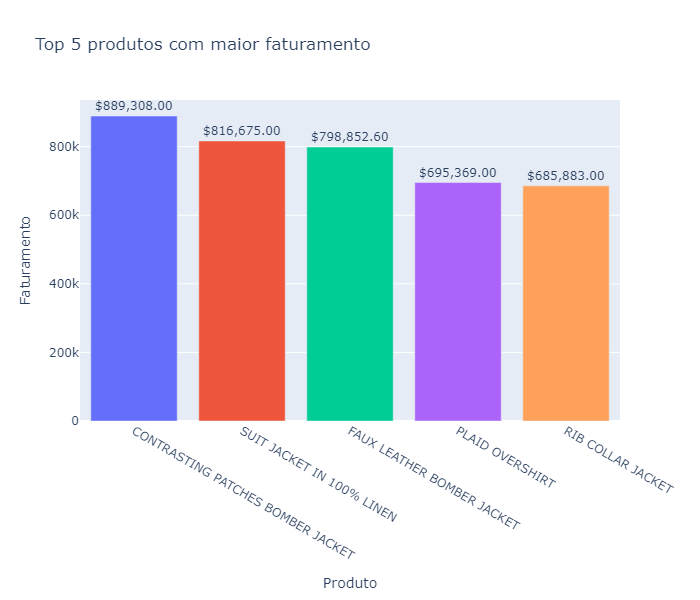

In [20]:
labels = top_produtos_faturamento.index
values = top_produtos_faturamento['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Top 5 produtos com maior faturamento', layout_xaxis_title='Produto', layout_yaxis_title='Faturamento', layout_height=600, layout_width=700)
fig.show(renderer="png")

## Top produtos com menor faturamento

In [21]:
top_produtos_menor_faturamento = df[['name', 'Total price']].groupby('name').sum().sort_values('Total price', ascending=True).head(5)
top_produtos_menor_faturamento_format = top_produtos_menor_faturamento.copy()
top_produtos_menor_faturamento_format['Total price'] = top_produtos_menor_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top_produtos_menor_faturamento_format)

,Total price
name,
HIGH COLLAR KNIT SWEATER,"$4,330.58"
DENIM SHIRT,"$21,888.15"
BASIC 100% WOOL SWEATER,"$21,916.57"
BASIC SLIM FIT T-SHIRT,"$23,482.00"
RETRO SNEAKERS,"$24,885.09"


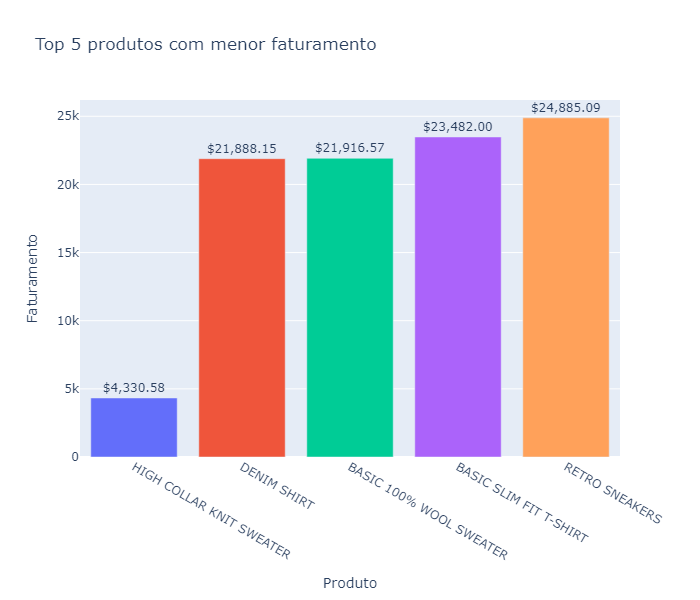

In [40]:
labels = top_produtos_menor_faturamento.index
values = top_produtos_menor_faturamento['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Top 5 produtos com menor faturamento', layout_xaxis_title='Produto', layout_yaxis_title='Faturamento', layout_height=600, layout_width=700)
fig.show(renderer="png")

## 📊 Faturamento por seção

In [23]:
faturamento_secao = df[['section', 'Total price']].groupby('section').sum().sort_values('Total price', ascending=False)
faturamento_secao_format = faturamento_secao.copy()
#formatando no padrão monetário
faturamento_secao_format['Total price'] = faturamento_secao_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(faturamento_secao_format)

,Total price
section,
MAN,"$35,712,663.03"
WOMAN,"$3,275,813.45"


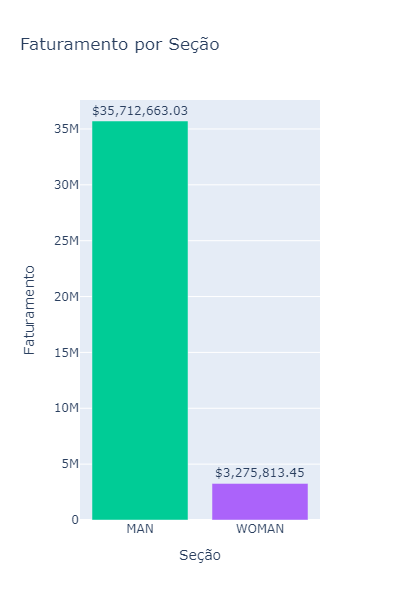

In [41]:
labels = faturamento_secao.index
values = faturamento_secao['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#00CC96', '#AB63FA']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Faturamento por Seção', layout_xaxis_title='Seção', layout_yaxis_title='Faturamento', layout_height=600, layout_width=400)
fig.show(renderer="png")

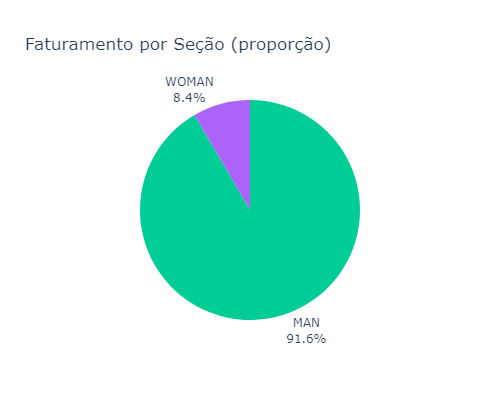

In [42]:
labels = faturamento_secao.index
values = faturamento_secao['Total price']

cores = ['#00CC96', '#AB63FA']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textposition='outside', textinfo='label+percent', marker_colors=cores)], layout_title_text='Faturamento por Seção (proporção)', layout_height=400, layout_showlegend=False, layout_width=500)
fig.show(renderer="png")

## 📈 Vendas por seção

In [26]:
vendas_secao = df[['section', 'Sales Volume']].groupby('section').sum().sort_values('Sales Volume', ascending=False)
vendas_secao_format = vendas_secao.copy()
#formatando padrão numérico
vendas_secao_format['Sales Volume'] = vendas_secao_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(vendas_secao_format)

,Sales Volume
section,
MAN,396.199
WOMAN,63.374


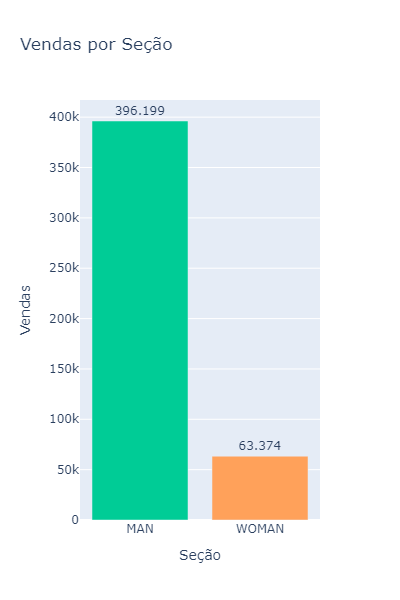

In [43]:
labels = vendas_secao.index
values = vendas_secao['Sales Volume']
textos_formatados = [f'{v:,.0f}'.replace(',','.') for v in values]
# Lista de cores personalizada
cores = ['#00CC96', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Vendas por Seção', layout_xaxis_title='Seção', layout_yaxis_title='Vendas', layout_height=600, layout_width=400)
fig.show(renderer="png")

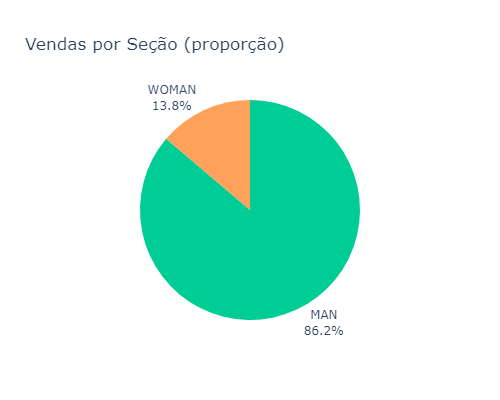

In [44]:
labels = vendas_secao.index
values = vendas_secao['Sales Volume']

cores = ['#00CC96', '#FFA15A']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', textposition='outside', marker_colors=cores)], layout_title_text='Vendas por Seção (proporção)', layout_height=400, layout_showlegend=False, layout_width=500)
fig.show(renderer="png")

## 💰 Faturamento por promoção

In [29]:
promocao = df[df['Promotion'] == 'Yes']
promocao_faturamento = promocao[['Promotion', 'Total price']].groupby('Promotion').sum().sort_values('Total price', ascending=False)
#formatando padrão numérico
promocao_faturamento['Total price'] = promocao_faturamento['Total price'].apply(lambda x: f'${x:,.2f}')
display(promocao_faturamento)

,Total price
Promotion,
Yes,"$19,994,386.90"


## 📈 Vendas por promoção

In [30]:
promocao = df[df['Promotion'] == 'Yes']
promocao_vendas = promocao[['Promotion', 'Sales Volume']].groupby('Promotion').sum().sort_values('Sales Volume', ascending=False)
#formatando padrão numérico
promocao_vendas['Sales Volume'] = promocao_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(promocao_vendas)

,Sales Volume
Promotion,
Yes,219.261


## 🔝 Top produtos por promoção (faturamento)

In [31]:
#obtendo o faturamento dos produtos promocionais
promo_faturamento = df[df['Promotion'] == 'Yes']
top5_faturamento = promo_faturamento[['name', 'Total price']].groupby('name').sum().sort_values('Total price', ascending=False).head(5)

top5_faturamento_format = top5_faturamento.copy()

#formatando padrão monetário
top5_faturamento_format['Total price'] = top5_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_faturamento_format)

,Total price
name,
FAUX LEATHER BOMBER JACKET,"$798,852.60"
SLIM FIT SUIT JACKET,"$675,719.00"
VINTAGE EFFECT LEATHER BOMBER JACKET,"$651,521.00"
FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,"$565,209.00"
CONTRASTING PATCHES BOMBER JACKET,"$552,876.00"


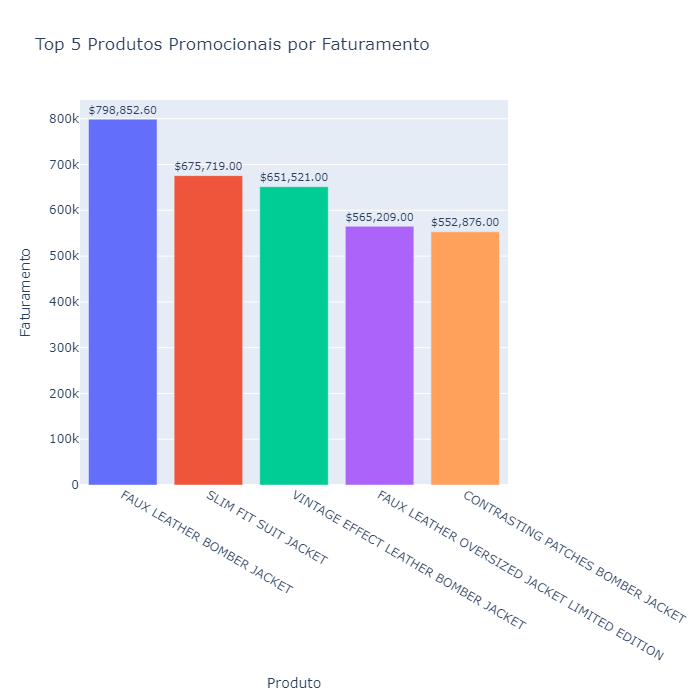

In [45]:
labels = top5_faturamento.index
values = top5_faturamento['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Top 5 Produtos Promocionais por Faturamento', layout_xaxis_title='Produto', layout_yaxis_title='Faturamento', layout_height=700, layout_width=700)
fig.show(renderer="png")

## 🔝 Top produtos sem promoção (faturamento)

In [33]:
sem_promo_faturamento = df[df['Promotion'] == 'No']
top5_faturamento_sem_promo = sem_promo_faturamento[['name', 'Total price']].groupby('name').sum().sort_values('Total price', ascending=False).head(5)

top5_faturamento_sem_promo_format = top5_faturamento_sem_promo.copy()

#formatando padrão monetário
top5_faturamento_sem_promo_format['Total price'] = top5_faturamento_sem_promo_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_faturamento_sem_promo_format)

,Total price
name,
SUIT JACKET IN 100% LINEN,"$816,675.00"
RIB COLLAR JACKET,"$685,883.00"
SUEDE JACKET,"$649,140.00"
FAUX LEATHER JACKET,"$563,978.70"
LONGLINE QUILTED JACKET,"$481,481.00"


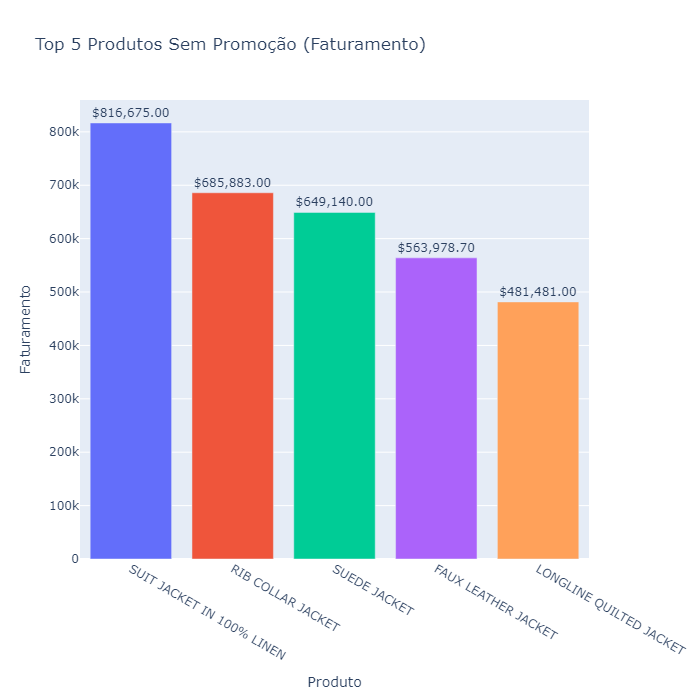

In [46]:
labels = top5_faturamento_sem_promo.index
values = top5_faturamento_sem_promo['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Top 5 Produtos Sem Promoção (Faturamento)', layout_xaxis_title='Produto', layout_yaxis_title='Faturamento', layout_height=700, layout_width=700)
fig.show(renderer="png")

## Top produtos com promoção (vendas)

In [35]:
promo_venda = df[df['Promotion'] == 'Yes']
top5_venda = promo_venda[['name', 'Sales Volume']].groupby('name').sum().sort_values('Sales Volume', ascending=False).head(5)
#formatando padrão monetário
top5_venda['Sales Volume'] = top5_venda['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_venda)

,Sales Volume
name,
FAUX LEATHER BOMBER JACKET,7.197
PLAID OVERSHIRT,5.413
SLIM FIT SUIT JACKET,5.021
STRETCH POCKET OVERSHIRT,4.762
CONTRASTING PATCHES BOMBER JACKET,4.442


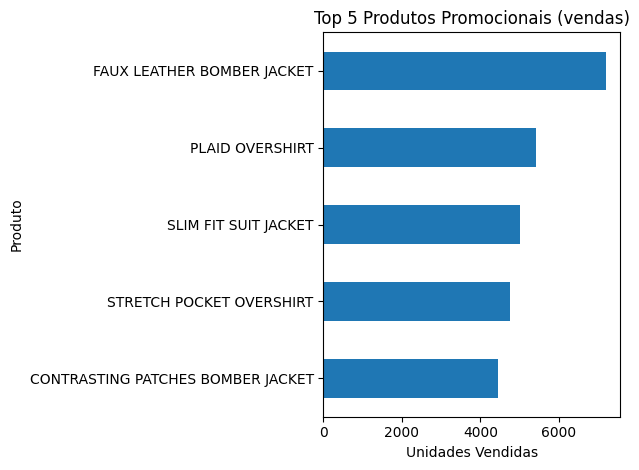

In [47]:
# Garanta que os dados são numéricos
top5_venda_plot = promo_venda[['name', 'Sales Volume']].groupby('name').sum().sort_values('Sales Volume', ascending=False).head(5)

top5_venda_plot.plot(kind='barh', legend=False)
plt.xlabel('Unidades Vendidas')
plt.ylabel('Produto')
plt.title('Top 5 Produtos Promocionais (vendas)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show('plt.png')

## Top produtos sem promoção (vendas)

In [37]:
sem_promo_vendas = df[df['Promotion'] == 'No']
top5_vendas = sem_promo_vendas[['name', 'Sales Volume']].groupby('name').sum().sort_values('Sales Volume', ascending=False).head(5)
#formatando padrão monetário
top5_vendas['Sales Volume'] = top5_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_vendas)

,Sales Volume
name,
FAUX LEATHER JACKET,7.113
SUIT JACKET IN 100% LINEN,6.075
RIB COLLAR JACKET,5.747
PLAID OVERSHIRT,5.497
PADDED BOMBER JACKET,4.583


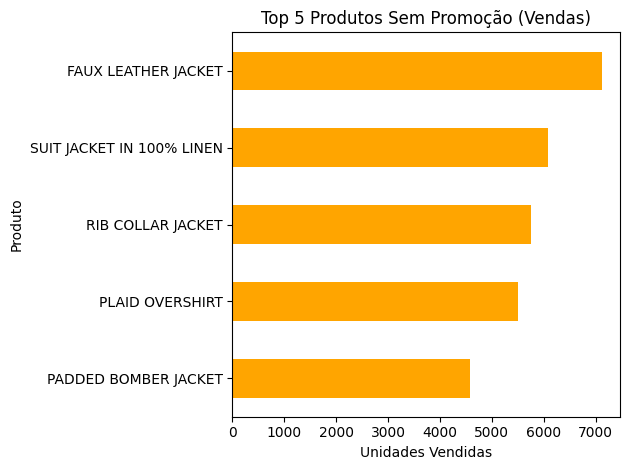

In [48]:
# Garanta que os dados são numéricos
top5_venda_plot = sem_promo_vendas[['name', 'Sales Volume']].groupby('name').sum().sort_values('Sales Volume', ascending=False).head(5)

top5_venda_plot.plot(kind='barh', legend=False, color='orange')
plt.xlabel('Unidades Vendidas')
plt.ylabel('Produto')
plt.title('Top 5 Produtos Sem Promoção (Vendas)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show('plt.png')

## 🔝🚹 Top produtos seção masculina (faturamento)

In [49]:
#obtendo apenas os produtos da seção masculina
secao_masculina = df[df['section'] == 'MAN']
top_5_secao_masc_faturamento = (secao_masculina[['section', 'name', 'Total price']].groupby(['section', 'name']).sum().reset_index().sort_values('Total price', ascending=False).head(5))

top_5_secao_masc_faturamento_format = top_5_secao_masc_faturamento.copy()

#formatando no padrão monetário
top_5_secao_masc_faturamento_format['Total price'] = top_5_secao_masc_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top_5_secao_masc_faturamento_format)

,section,name,Total price
28,MAN,CONTRASTING PATCHES BOMBER JACKET,"$889,308.00"
132,MAN,SUIT JACKET IN 100% LINEN,"$816,675.00"
45,MAN,FAUX LEATHER BOMBER JACKET,"$798,852.60"
90,MAN,PLAID OVERSHIRT,"$695,369.00"
108,MAN,RIB COLLAR JACKET,"$685,883.00"


In [ ]:
fig = px.bar(
    top_5_secao_masc_faturamento,
    x='Total price',
    y='name',
    facet_col='section',
    orientation='h',
    color='name',
    title='Top 5 Produtos Seção Masculina (Faturamento)',
    text=top_5_secao_masc_faturamento['Total price'].apply(lambda x: f'${x:,.2f}')
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Faturamento'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show()

## 🔝🚹 Top produtos seção masculina (vendas)

In [51]:
#obtendo apenas os produtos da seção masculina
secao_masculina = df[df['section'] == 'MAN']
top_5_secao_masc_vendas = (secao_masculina[['section', 'name', 'Sales Volume']].groupby(['section', 'name']).sum().reset_index().sort_values('Sales Volume', ascending=False).head(5))

top_5_secao_masc_vendas_format = top_5_secao_masc_vendas.copy()

#formatando no padrão monetário
top_5_secao_masc_vendas_format['Sales Volume'] = top_5_secao_masc_vendas_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',', '.'))
display(top_5_secao_masc_vendas_format)

,section,name,Sales Volume
90,MAN,PLAID OVERSHIRT,10.910
96,MAN,POCKET OVERSHIRT,7.386
45,MAN,FAUX LEATHER BOMBER JACKET,7.197
47,MAN,FAUX LEATHER JACKET,7.113
28,MAN,CONTRASTING PATCHES BOMBER JACKET,7.050


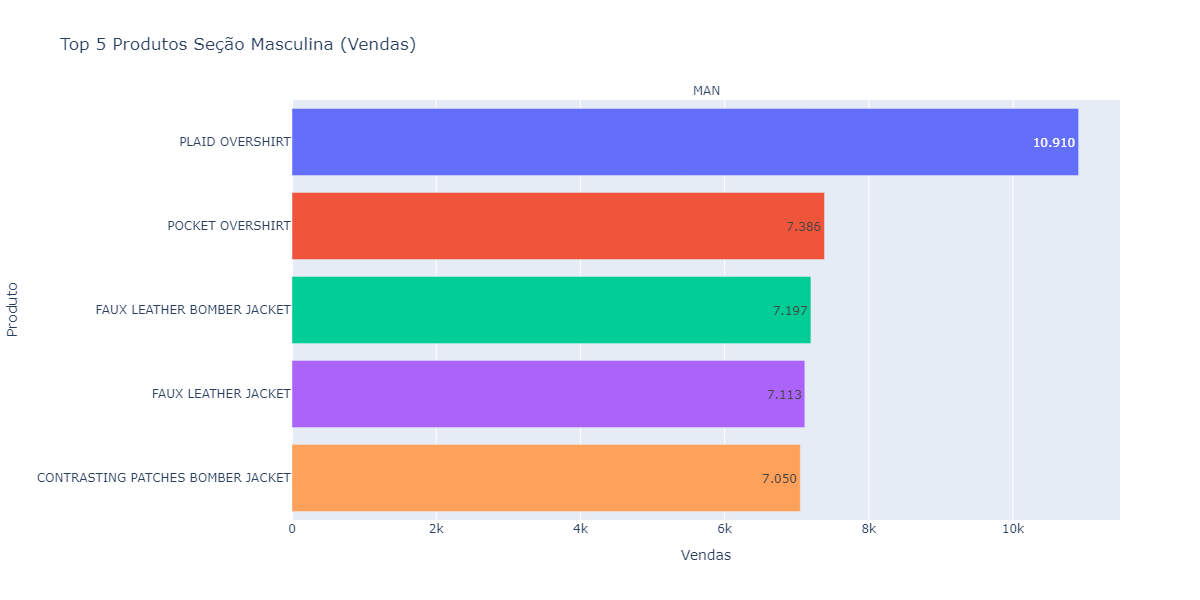

In [52]:
fig = px.bar(
    top_5_secao_masc_vendas,
    x='Sales Volume',
    y='name',
    facet_col='section',
    orientation='h',
    color='name',
    title='Top 5 Produtos Seção Masculina (Vendas)',
    text=top_5_secao_masc_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Vendas'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## 🚺💰 Top produtos seção feminina (faturamento)

In [53]:
#obtendo apenas os produtos da seção feminina
secao_feminina = df[df['section'] == 'WOMAN']
top5_feminina_faturamento = (secao_feminina[['section', 'name', 'Total price']].groupby(['section', 'name']).sum().reset_index().sort_values('Total price', ascending=False).head(5))

top5_feminina_faturamento_format = top5_feminina_faturamento.copy()

#formatando no padrão monetário
top5_feminina_faturamento_format['Total price'] = top5_feminina_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_feminina_faturamento_format)

,section,name,Total price
8,WOMAN,CASHMERE BLEND KNIT SWEATER,"$434,668.00"
21,WOMAN,KNIT SWEATER WITH PEARLS,"$192,924.00"
3,WOMAN,ASYMMETRICAL WOOL AND SILK BLEND SWEATER,"$172,332.30"
10,WOMAN,CONTRAST TOPSTITCHING CROP KNIT SWEATER,"$156,099.40"
17,WOMAN,JEWEL KNIT SWEATER,"$149,390.60"


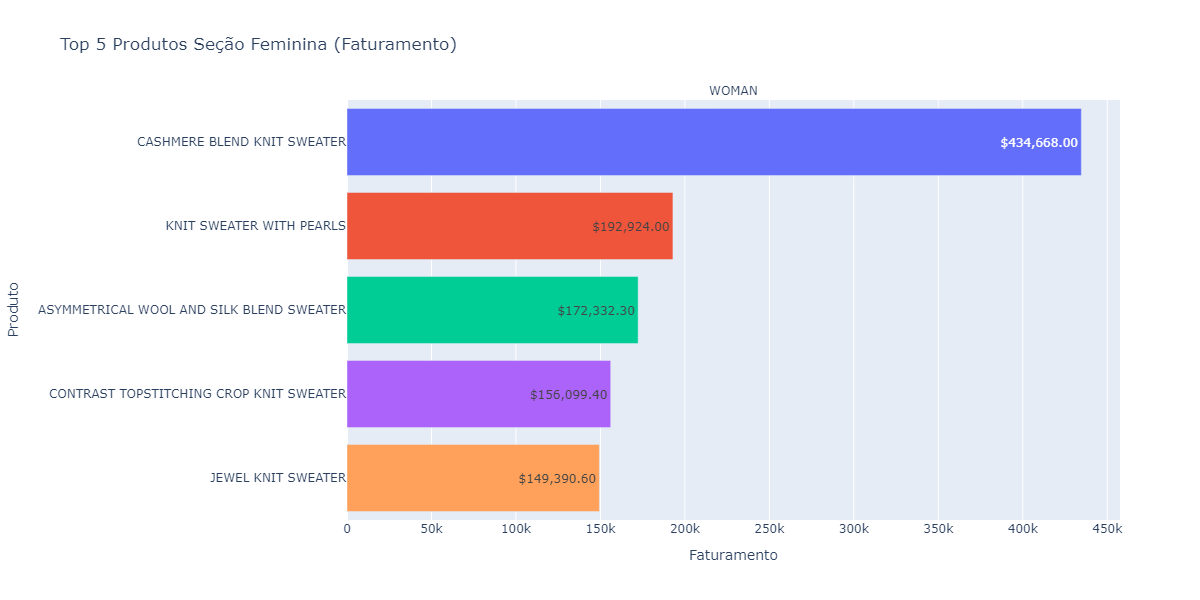

In [54]:
fig = px.bar(
    top5_feminina_faturamento,
    x='Total price',
    y='name',
    facet_col='section',
    orientation='h',
    color='name',
    title='Top 5 Produtos Seção Feminina (Faturamento)',
    text=top5_feminina_faturamento['Total price'].apply(lambda x: f'${x:,.2f}')
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Faturamento'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## top produtos seção feminina (vendas)

In [55]:
#obtendo apenas os produtos da seção feminina
secao_feminina = df[df['section'] == 'WOMAN']
top5_feminina_vendas = (secao_feminina[['section', 'name', 'Sales Volume']].groupby(['section', 'name']).sum().reset_index().sort_values('Sales Volume', ascending=False).head(5))

top5_feminina_vendas_format = top5_feminina_vendas.copy()

#formatando no padrão monetário
top5_feminina_vendas_format['Sales Volume'] = top5_feminina_vendas_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_feminina_vendas_format)

,section,name,Sales Volume
15,WOMAN,GATHERED WAIST KNIT SWEATER,2.901
3,WOMAN,ASYMMETRICAL WOOL AND SILK BLEND SWEATER,2.877
2,WOMAN,ASYMMETRIC CROPPED KNIT SWEATER,2.863
12,WOMAN,FINE KNIT CROP SWEATER,2.835
6,WOMAN,BASIC KNIT SWEATER,2.778


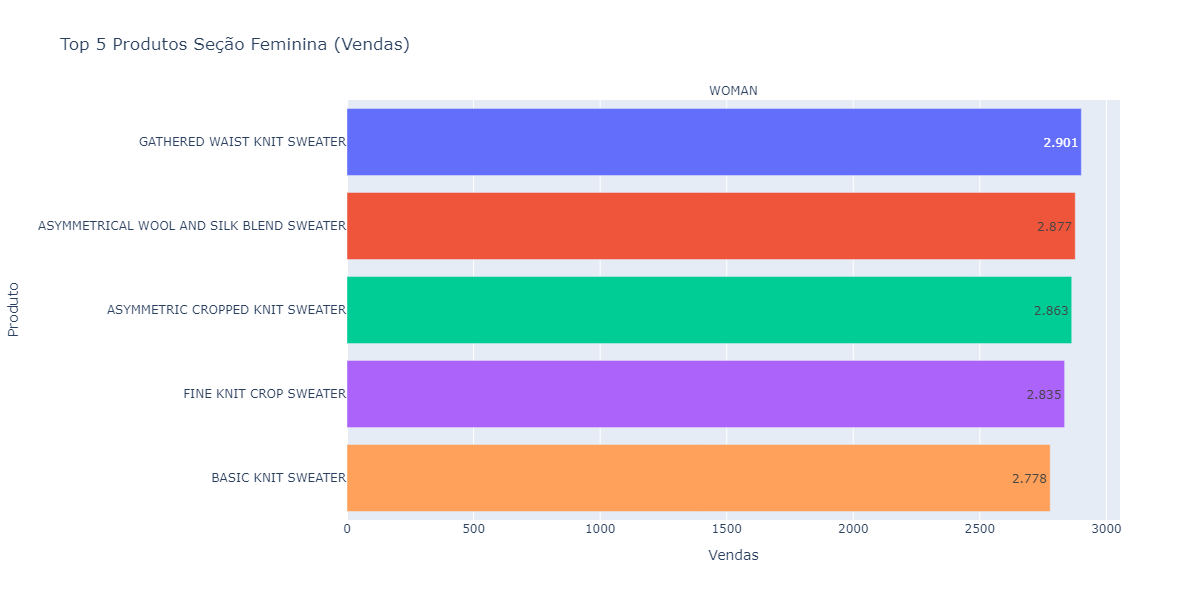

In [56]:
fig = px.bar(
    top5_feminina_vendas,
    x='Sales Volume',
    y='name',
    facet_col='section',
    orientation='h',
    color='name',
    title='Top 5 Produtos Seção Feminina (Vendas)',
    text=top5_feminina_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Vendas'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Posição do produto na loja (faturamento)

In [57]:
#obtendo o faturamento das posições
posicao_produto = df[['Product Position', 'Total price']].groupby('Product Position').sum().sort_values('Total price', ascending=False)

posicao_produto_format = posicao_produto.copy()

#formatando padrão monetário
posicao_produto_format['Total price'] = posicao_produto_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(posicao_produto_format)

,Total price
Product Position,
Aisle,"$15,481,438.43"
End-cap,"$12,546,465.81"
Front of Store,"$10,960,572.24"


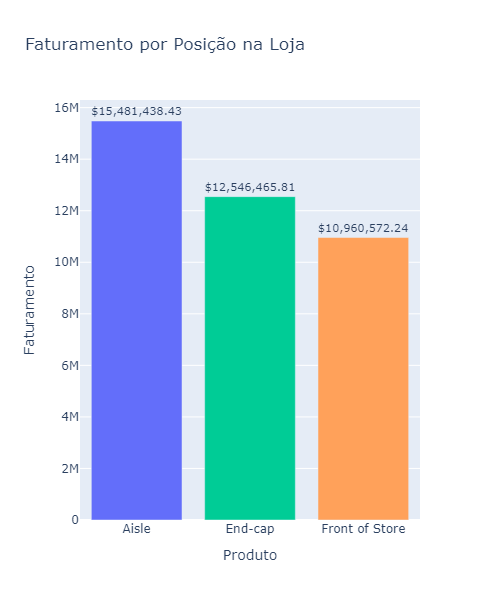

In [58]:
labels = posicao_produto.index
values = posicao_produto['Total price']
textos_formatados = [f'${v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#00CC96', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Faturamento por Posição na Loja', layout_xaxis_title='Produto', layout_yaxis_title='Faturamento', layout_height=600, layout_width=500)
fig.show(renderer="png")

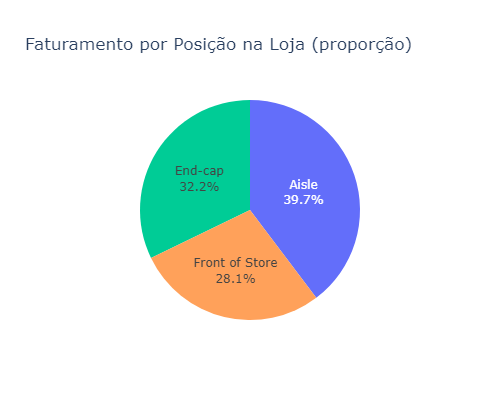

In [59]:
labels = posicao_produto.index
values = posicao_produto['Total price']

cores = ['#636EFA', '#00CC96', '#FFA15A']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', marker_colors=cores)], layout_title_text='Faturamento por Posição na Loja (proporção)', layout_height=400, layout_showlegend=False, layout_width=500)
fig.show(renderer="png")

## Posição do produto na loja (vendas)

In [60]:
#obtendo as vendas das posições
posicao_produto_vendas = df[['Product Position', 'Sales Volume']].groupby('Product Position').sum().sort_values('Sales Volume', ascending=False)

posicao_produto_vendas_format = posicao_produto_vendas.copy()

#formatando padrão monetário
posicao_produto_vendas_format['Sales Volume'] = posicao_produto_vendas_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(posicao_produto_vendas_format)

,Sales Volume
Product Position,
Aisle,177.396
End-cap,152.930
Front of Store,129.247


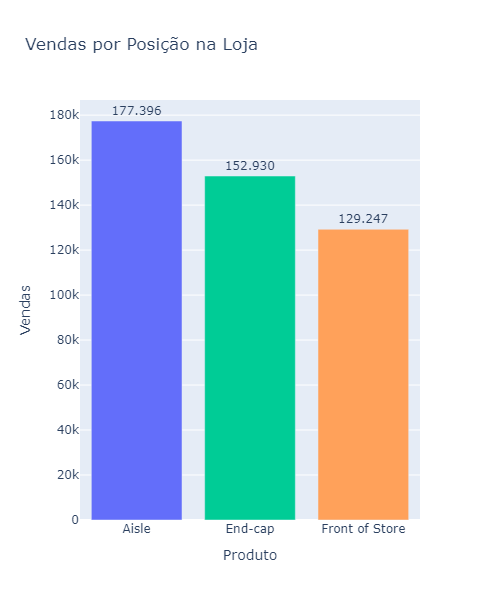

In [61]:
labels = posicao_produto_vendas.index
values = posicao_produto_vendas['Sales Volume']
textos_formatados = [f'{v:,.0f}'.replace(',','.') for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#00CC96', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Vendas por Posição na Loja', layout_xaxis_title='Produto', layout_yaxis_title='Vendas', layout_height=600, layout_width=500)
fig.show(renderer="png")

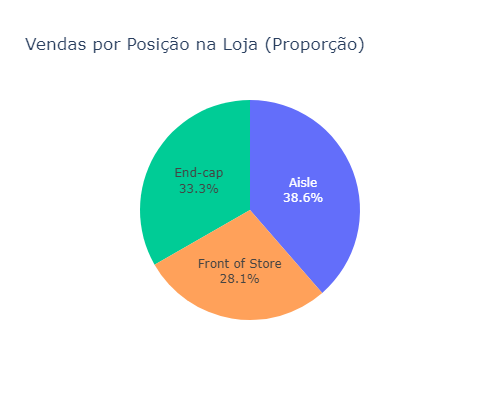

In [62]:
labels = posicao_produto_vendas.index
values = posicao_produto_vendas['Sales Volume']

cores = ['#636EFA', '#00CC96', '#FFA15A']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', marker_colors=cores)], layout_title_text='Vendas por Posição na Loja (Proporção)', layout_height=400, layout_showlegend=False, layout_width=500)
fig.show(renderer="png")

## Top produtos posição na loja (faturamento)

In [63]:
#obtendo o top 5 prdutos em cada posição
top5_produtos_posicao = (df[['Product Position', 'name', 'Total price']].groupby(['Product Position', 'name']).sum().reset_index().sort_values(['Product Position', 'Total price'], ascending=[True, False]).groupby('Product Position').head(5))
#formatando o padrão monetário
top5_produtos_posicao['Total price'] = top5_produtos_posicao['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_produtos_posicao)

,Product Position,name,Total price
73,Aisle,SUIT JACKET IN 100% LINEN,"$710,304.00"
68,Aisle,SUEDE JACKET,"$649,140.00"
12,Aisle,BOUCLÉ TEXTURED JACKET,"$609,950.00"
50,Aisle,POCKET JACKET,"$608,503.00"
37,Aisle,LEATHER JACKET,"$511,384.20"
160,End-cap,VINTAGE EFFECT LEATHER BOMBER JACKET,"$651,521.00"
162,End-cap,WOOL BLEND TEXTURED JACKET,"$447,174.00"
101,End-cap,DOUBLE FACED JACKET,"$408,938.00"
106,End-cap,FAUX LEATHER JACKET,"$376,297.20"
104,End-cap,FAUX LEATHER BOMBER JACKET,"$364,458.00"


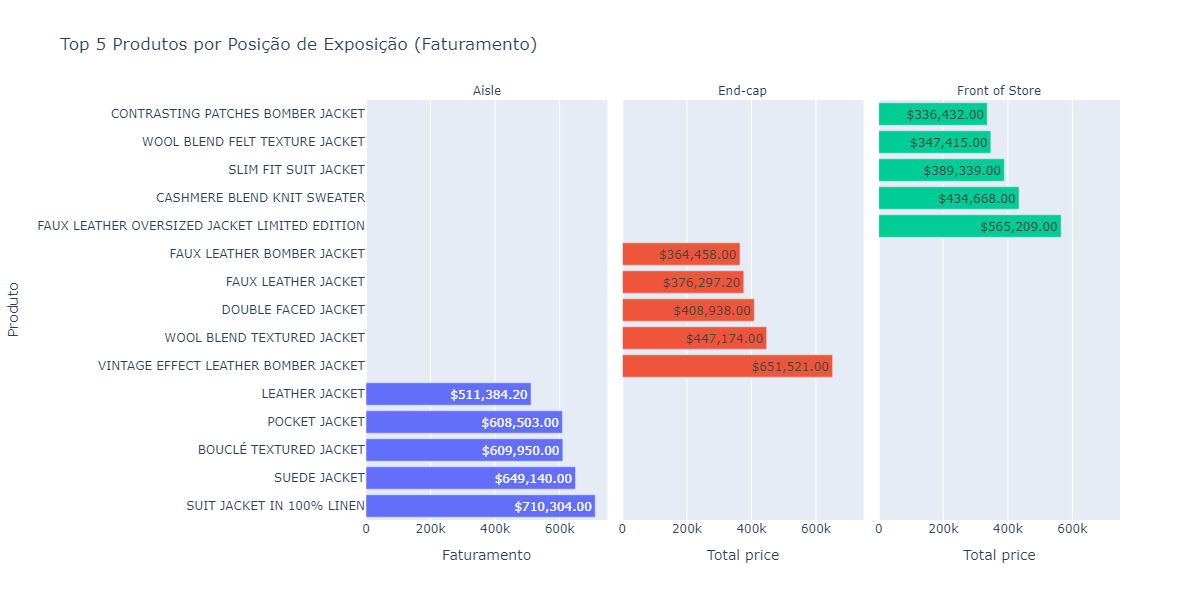

In [64]:
top5_produtos_posicao['Total price'] = top5_produtos_posicao['Total price'].replace('[\$,]', '', regex=True).astype(float)

fig = px.bar(
    top5_produtos_posicao,
    x='Total price',
    y='name',
    facet_col='Product Position',
    orientation='h',
    color='Product Position',
    title='Top 5 Produtos por Posição de Exposição (Faturamento)',
    text=top5_produtos_posicao['Total price'].apply(lambda x: f'${x:,.2f}')
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Faturamento'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Top produtos posição na loja (vendas)

In [65]:
#obtendo o top 5 prdutos em cada posição
top5_produtos_posicao_venda = (df[['Product Position', 'name', 'Sales Volume']].groupby(['Product Position', 'name']).sum().reset_index().sort_values(['Product Position', 'Sales Volume'], ascending=[True, False]).groupby('Product Position').head(5))

top5_produtos_posicao_venda_format = top5_produtos_posicao_venda.copy()

#formatando o padrão monetário
top5_produtos_posicao_venda_format['Sales Volume'] = top5_produtos_posicao_venda_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_produtos_posicao_venda_format)

,Product Position,name,Sales Volume
47,Aisle,PLAID OVERSHIRT,6.449
46,Aisle,PATCH BOMBER JACKET,5.480
73,Aisle,SUIT JACKET IN 100% LINEN,5.406
12,Aisle,BOUCLÉ TEXTURED JACKET,5.170
50,Aisle,POCKET JACKET,4.497
106,End-cap,FAUX LEATHER JACKET,4.428
98,End-cap,CONTRASTING COLLAR JACKET,3.970
139,End-cap,POCKET OVERSHIRT,3.835
131,End-cap,MULTIPIECE SNEAKERS,3.541
90,End-cap,BAGGY FIT JEANS,2.984


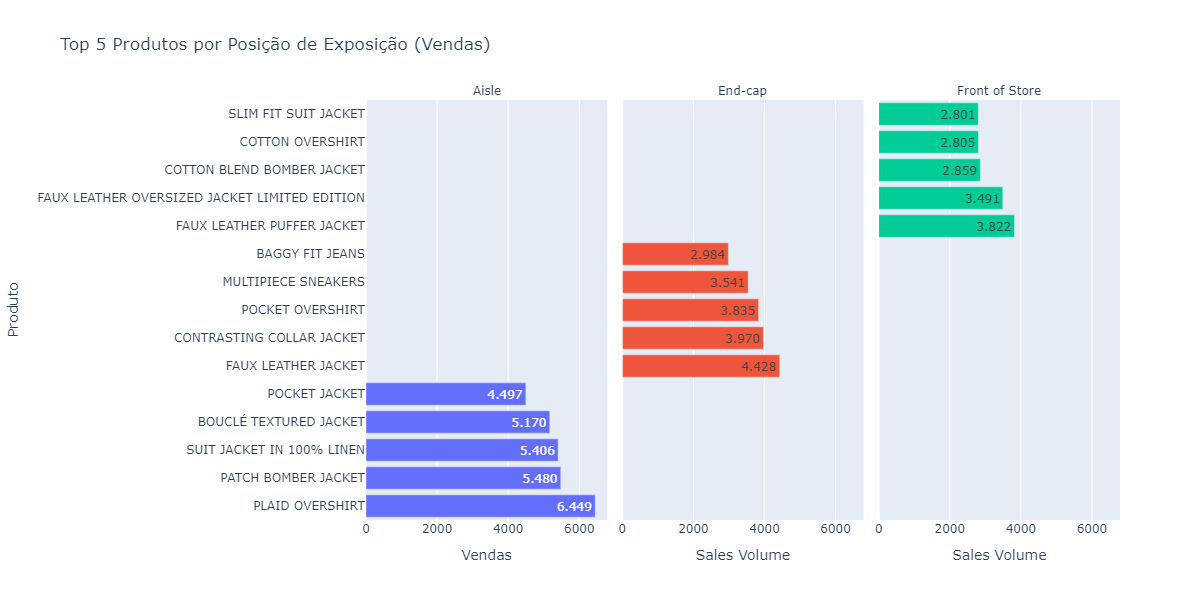

In [66]:
fig = px.bar(
    top5_produtos_posicao_venda,
    x='Sales Volume',
    y='name',
    facet_col='Product Position',
    orientation='h',
    color='Product Position',
    title='Top 5 Produtos por Posição de Exposição (Vendas)',
    text=top5_produtos_posicao_venda['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
)

fig.update_layout(
    height=600,
    width=1200,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Vendas'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Produtos Sazonais e não sazonais (faturamento)

In [67]:
#obtendo o faturameto dos produtos sazonais
produto_sazonal = df[['Seasonal', 'Total price']].groupby('Seasonal').sum().sort_values('Total price', ascending=False)

produto_sazonal_format = produto_sazonal.copy()

#formatando padrão monetário
produto_sazonal_format['Total price'] = produto_sazonal_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(produto_sazonal_format)

,Total price
Seasonal,
Yes,"$19,832,088.66"
No,"$19,156,387.82"


## Produtos Sazonais e não sazonais (vendas)

In [68]:
#obtendo as vendas dos produtos sazonais
produto_sazonal_vendas = df[['Seasonal', 'Sales Volume']].groupby('Seasonal').sum().sort_values('Sales Volume', ascending=False)
#formatando padrão monetário
produto_sazonal_vendas['Sales Volume'] = produto_sazonal_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(produto_sazonal_vendas)

,Sales Volume
Seasonal,
Yes,233.181
No,226.392


## Top produtos sazonais e não sazonais (faturamento)

In [69]:
#Obtendo o faturamento do top 5 produtos sazonais
top5_sazonais_faturamento = df[['Seasonal', 'name', 'Total price']].groupby(['Seasonal', 'name']).sum().reset_index().sort_values(['Seasonal', 'Total price'], ascending=[True, False]).groupby('Total price').head(5)

top5_sazonais_faturamento_format = top5_sazonais_faturamento.copy()

#formatando valor monetário
top5_sazonais_faturamento_format['Total price'] = top5_sazonais_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_sazonais_faturamento_format)

,Seasonal,name,Total price
87,No,SUEDE JACKET,"$649,140.00"
31,No,FAUX LEATHER OVERSIZED JACKET LIMITED EDITION,"$565,209.00"
30,No,FAUX LEATHER JACKET,"$563,978.70"
93,No,SUIT JACKET IN 100% LINEN,"$491,310.00"
29,No,FAUX LEATHER BOMBER JACKET,"$434,394.60"
...,...,...,...
208,Yes,V-NECK KNIT SWEATER,"$26,728.20"
187,Yes,RETRO SNEAKERS,"$24,885.09"
122,Yes,BASIC SLIM FIT T-SHIRT,"$23,482.00"
117,Yes,BASIC 100% WOOL SWEATER,"$21,916.57"


## Top produtos sazonais e não sazonais (vendas)

In [70]:
#Obtendo o faturamento do top 5 produtos sazonais
top5_sazonais_vendas = df[['Seasonal', 'name', 'Sales Volume']].groupby(['Seasonal', 'name']).sum().sort_values(['Seasonal', 'Sales Volume'], ascending=[True, False]).groupby('Sales Volume').head(5)
#formatando valor monetário
top5_sazonais_vendas['Sales Volume'] = top5_sazonais_vendas['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_sazonais_vendas)

Sales Volume
Seasonal name                                   
No       FAUX LEATHER JACKET               7.113
         LIGHTWEIGHT BOMBER JACKET         6.694
         FAUX LEATHER BOMBER JACKET        4.575
         PLAID OVERSHIRT                   4.461
         SUEDE SNEAKERS                    3.890
...                                          ...
Yes      MIXED COLLAR JACKET                 628
         PLEATED WIDE FIT JEANS              624
         V-NECK KNIT SWEATER                 558
         HIGH COLLAR KNIT SWEATER            542
         ABSTRACT JACQUARD SWEATER           529

[219 rows x 1 columns]

## 📊 Faturamento por subcategorias

In [71]:
#obtendo faturamento das subcategorias
subcategorias_faturamento = df[['terms', 'Total price']].groupby('terms').sum().sort_values('Total price', ascending=False)

subcategorias_faturamento_format = subcategorias_faturamento.copy()

#formatando padrão monetário
subcategorias_faturamento_format['Total price'] = subcategorias_faturamento_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(subcategorias_faturamento_format)

,Total price
terms,
jackets,"$26,581,815.87"
sweaters,"$4,090,631.48"
shoes,"$3,754,837.63"
t-shirts,"$3,696,806.25"
jeans,"$864,385.25"


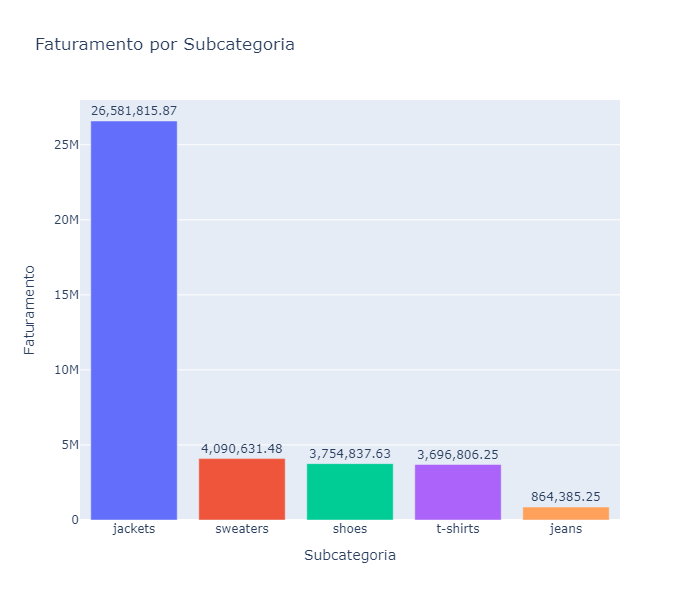

In [72]:
labels = subcategorias_faturamento.index
values = subcategorias_faturamento['Total price']
textos_formatados = [f'{v:,.2f}' for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Faturamento por Subcategoria', layout_xaxis_title='Subcategoria', layout_yaxis_title='Faturamento', layout_height=600, layout_width=700)
fig.show(renderer="png")

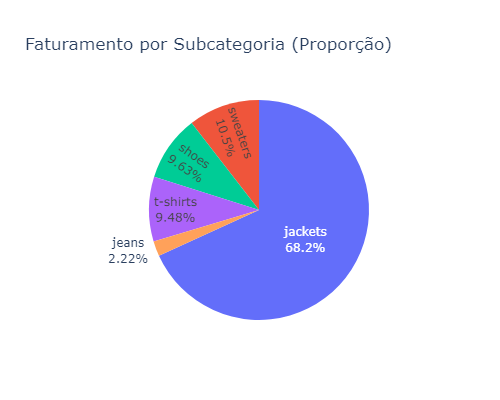

In [73]:
labels = subcategorias_faturamento.index
values = subcategorias_faturamento['Total price']

cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent', marker_colors=cores)], layout_title_text='Faturamento por Subcategoria (Proporção)', layout_height=400, layout_showlegend=False, layout_width=500)
fig.show(renderer="png")

## 🛒 Vendas por subcategorias

In [74]:
#obtendo as vendas das subcategorias
subcategorias_vendas = df[['terms', 'Sales Volume']].groupby('terms').sum().sort_values('Sales Volume', ascending=False)

subcategorias_vendas_format = subcategorias_vendas.copy()

#formatando padrão numérico
subcategorias_vendas_format['Sales Volume'] = subcategorias_vendas_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(subcategorias_vendas_format)

,Sales Volume
terms,
jackets,259.468
sweaters,75.242
shoes,57.906
t-shirts,53.637
jeans,13.320


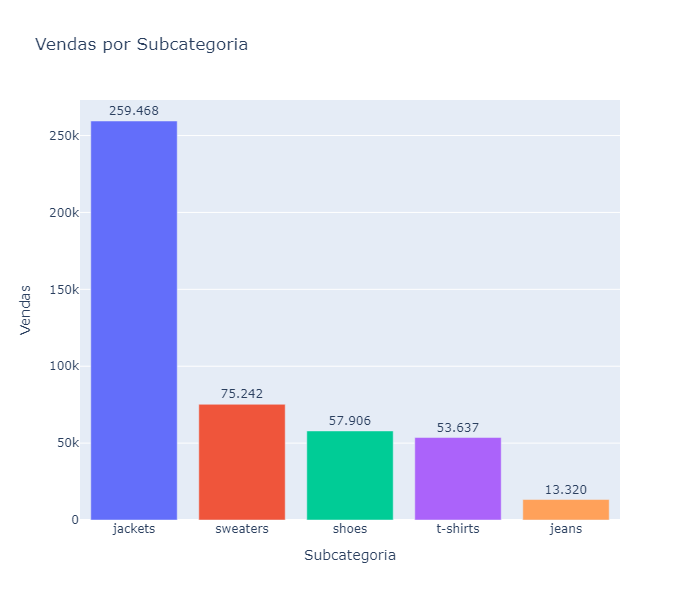

In [75]:
labels = subcategorias_vendas.index
values = subcategorias_vendas['Sales Volume']
textos_formatados = [f'{v:,.0f}'.replace(',','.') for v in values]
# Lista de cores (pode personalizar)
cores = ['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A']
fig = go.Figure(data=[go.Bar(x=labels, y=values, marker_color=cores, text=textos_formatados, textposition='outside')], 
                layout_title_text='Vendas por Subcategoria', layout_xaxis_title='Subcategoria', layout_yaxis_title='Vendas', layout_height=600, layout_width=700)
fig.show(renderer="png")

## Subcategoria x Gênero (vendas)

In [76]:
genero_masc = df[df['section']=='MAN']
subcategoria_masc_faturamento = genero_masc[['terms', 'section', 'Sales Volume']].groupby(['terms','section']).sum().reset_index().sort_values('Sales Volume', ascending=False).head(5)
subcategoria_masc_faturamento_format = subcategoria_masc_faturamento.copy()
subcategoria_masc_faturamento_format['Sales Volume'] = subcategoria_masc_faturamento_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(subcategoria_masc_faturamento_format)

genero_fem = df[df['section']=='WOMAN']
subcategoria_fem_faturamento = genero_fem[['terms', 'section', 'Sales Volume']].groupby(['terms','section']).sum().reset_index().sort_values('Sales Volume', ascending=False).head(5)
subcategoria_fem_faturamento['Sales Volume'] = subcategoria_fem_faturamento['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(subcategoria_fem_faturamento)

,terms,section,Sales Volume
0,jackets,MAN,259.468
2,shoes,MAN,57.906
4,t-shirts,MAN,53.637
1,jeans,MAN,13.320
3,sweaters,MAN,11.868


,terms,section,Sales Volume
0,sweaters,WOMAN,63.374


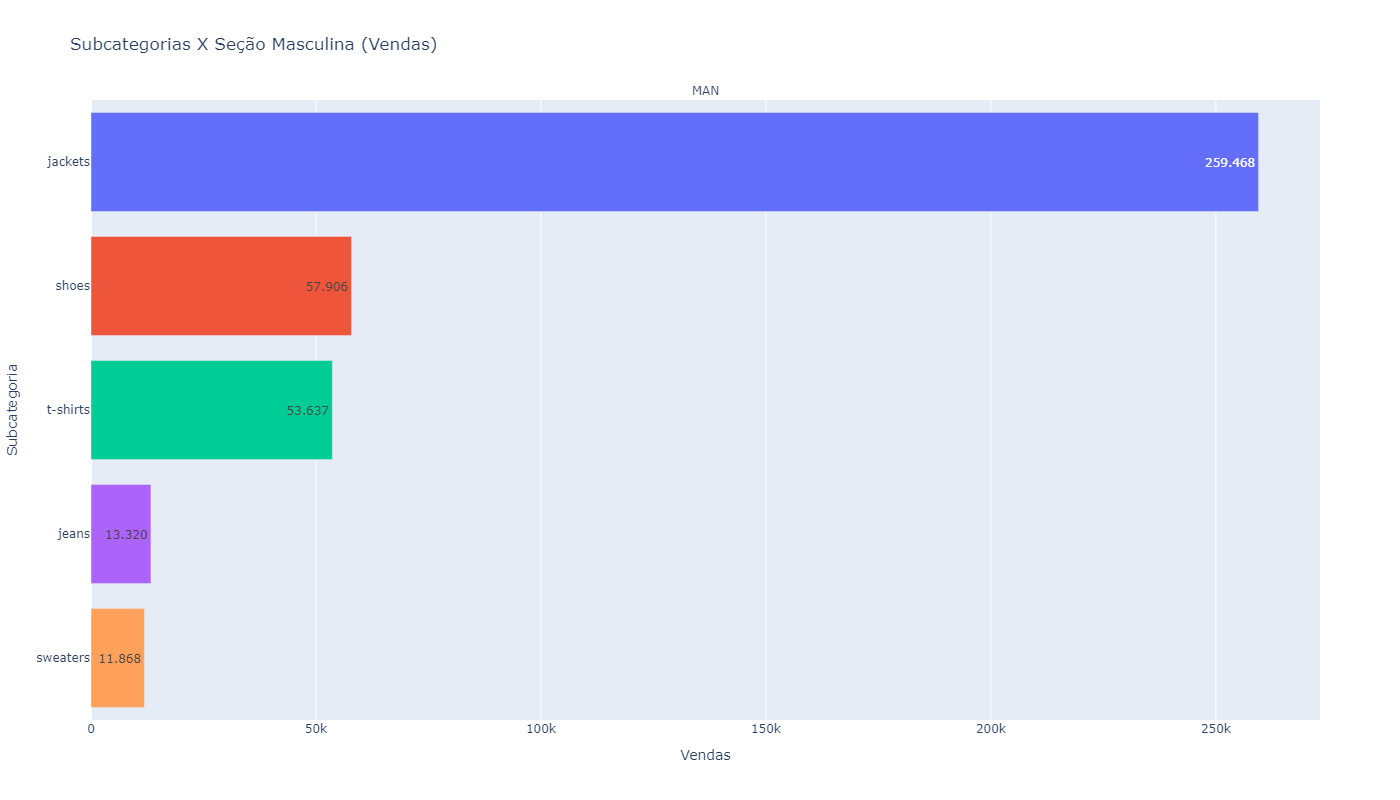

In [77]:
fig = px.bar(
    subcategoria_masc_faturamento,
    x='Sales Volume',
    y='terms',
    facet_col='section',
    orientation='h',
    color='terms',
    title='Subcategorias X Seção Masculina (Vendas)',
    text=subcategoria_masc_faturamento['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
)

fig.update_layout(
    height=800,
    width=1400,
    showlegend=False,
    yaxis_title='Subcategoria',
    xaxis_title='Vendas'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Top produtos por subcategorias (faturamento)

In [78]:
#obtendo o faturamento do top 5 produtos de cada subcategoria
top5_faturamento_subcategorias = (df[['terms', 'name', 'Total price']].groupby(['terms', 'name']).sum().reset_index().sort_values(['terms', 'Total price'], ascending=[True, False]).groupby('terms').head(5))

top5_faturamento_subcategorias_format = top5_faturamento_subcategorias.copy()

#formatando padrão monetário
top5_faturamento_subcategorias_format['Total price'] = top5_faturamento_subcategorias_format['Total price'].apply(lambda x: f'${x:,.2f}')
display(top5_faturamento_subcategorias_format)

,terms,name,Total price
12,jackets,CONTRASTING PATCHES BOMBER JACKET,"$889,308.00"
62,jackets,PLAID OVERSHIRT,"$695,369.00"
73,jackets,RIB COLLAR JACKET,"$685,883.00"
75,jackets,SLIM FIT SUIT JACKET,"$675,719.00"
67,jackets,POCKET OVERSHIRT,"$666,987.80"
105,jeans,BAGGY FIT JEANS,"$208,581.60"
110,jeans,RIPPED STRAIGHT FIT JEANS,"$203,688.60"
108,jeans,FLARED FIT CARGO JEANS,"$159,794.00"
106,jeans,BAGGY FIT JEANS LIMITED EDITION,"$145,671.60"
104,jeans,BAGGY BELTED JEANS,"$93,623.70"


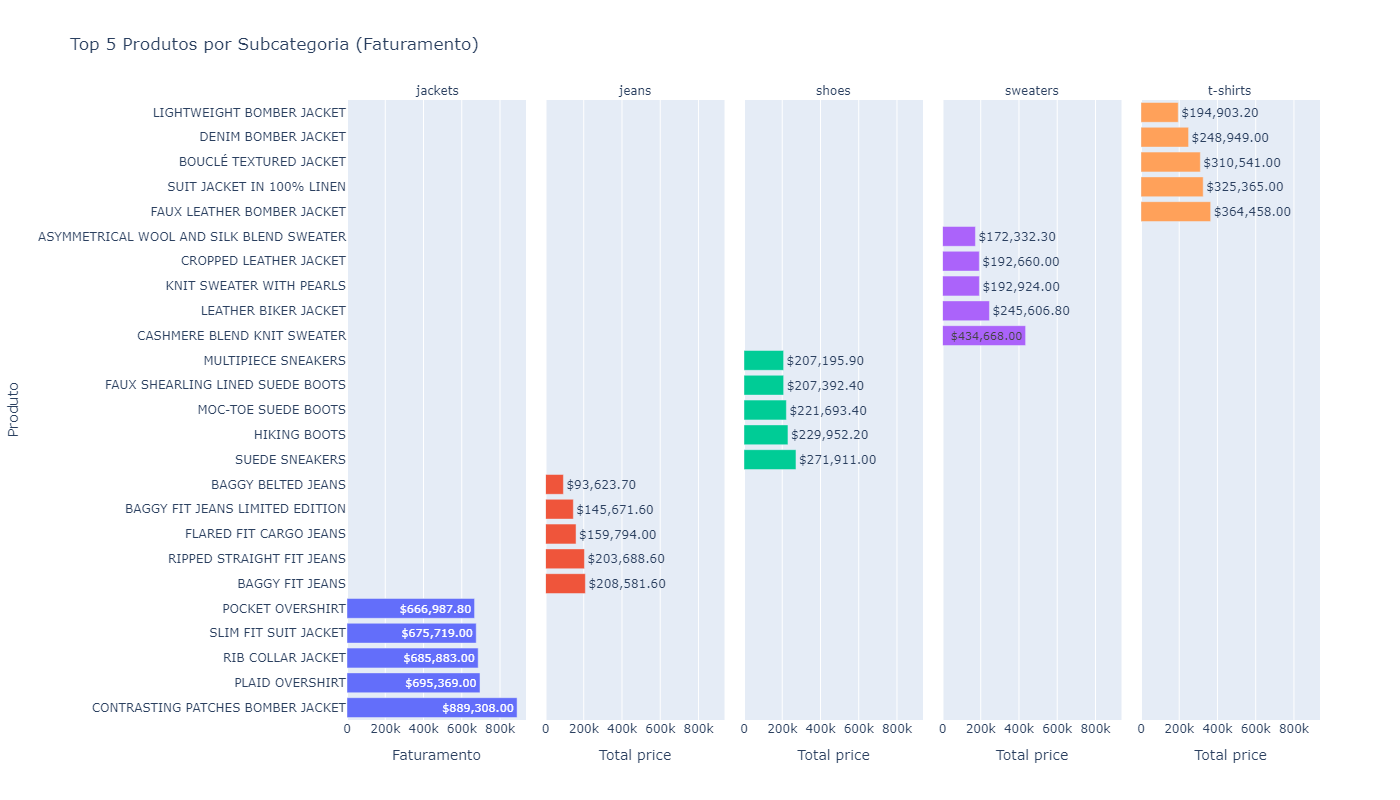

In [79]:
fig = px.bar(
    top5_faturamento_subcategorias,
    x='Total price',
    y='name',
    facet_col='terms',
    orientation='h',
    color='terms',
    title='Top 5 Produtos por Subcategoria (Faturamento)',
    text=top5_faturamento_subcategorias['Total price'].apply(lambda x: f'${x:,.2f}')
)

fig.update_layout(
    height=800,
    width=1400,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Faturamento'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Top produtos com maior vendas (subcategorias)

In [81]:
#obtendo as vendas do top 5 produtos de cada subcategoria
top5_produtos_subcategorias_vendas = (df[['terms', 'name', 'Sales Volume']].groupby(['terms', 'name']).sum().reset_index().sort_values(['terms', 'Sales Volume'], ascending=[True, False]).groupby('terms').head(5))

top5_produtos_subcategorias_vendas_format = top5_produtos_subcategorias_vendas.copy()

#formatando padrão numérico
top5_produtos_subcategorias_vendas_format['Sales Volume'] = top5_produtos_subcategorias_vendas_format['Sales Volume'].apply(lambda x: f'{x:,.0f}'.replace(',','.'))
display(top5_produtos_subcategorias_vendas_format)

,terms,name,Sales Volume
62,jackets,PLAID OVERSHIRT,10.910
67,jackets,POCKET OVERSHIRT,7.386
12,jackets,CONTRASTING PATCHES BOMBER JACKET,7.050
30,jackets,FAUX LEATHER PUFFER JACKET,6.401
61,jackets,PATCH BOMBER JACKET,5.752
105,jeans,BAGGY FIT JEANS,2.984
110,jeans,RIPPED STRAIGHT FIT JEANS,2.914
106,jeans,BAGGY FIT JEANS LIMITED EDITION,2.084
107,jeans,DENIM SHIRT,1.685
104,jeans,BAGGY BELTED JEANS,1.563


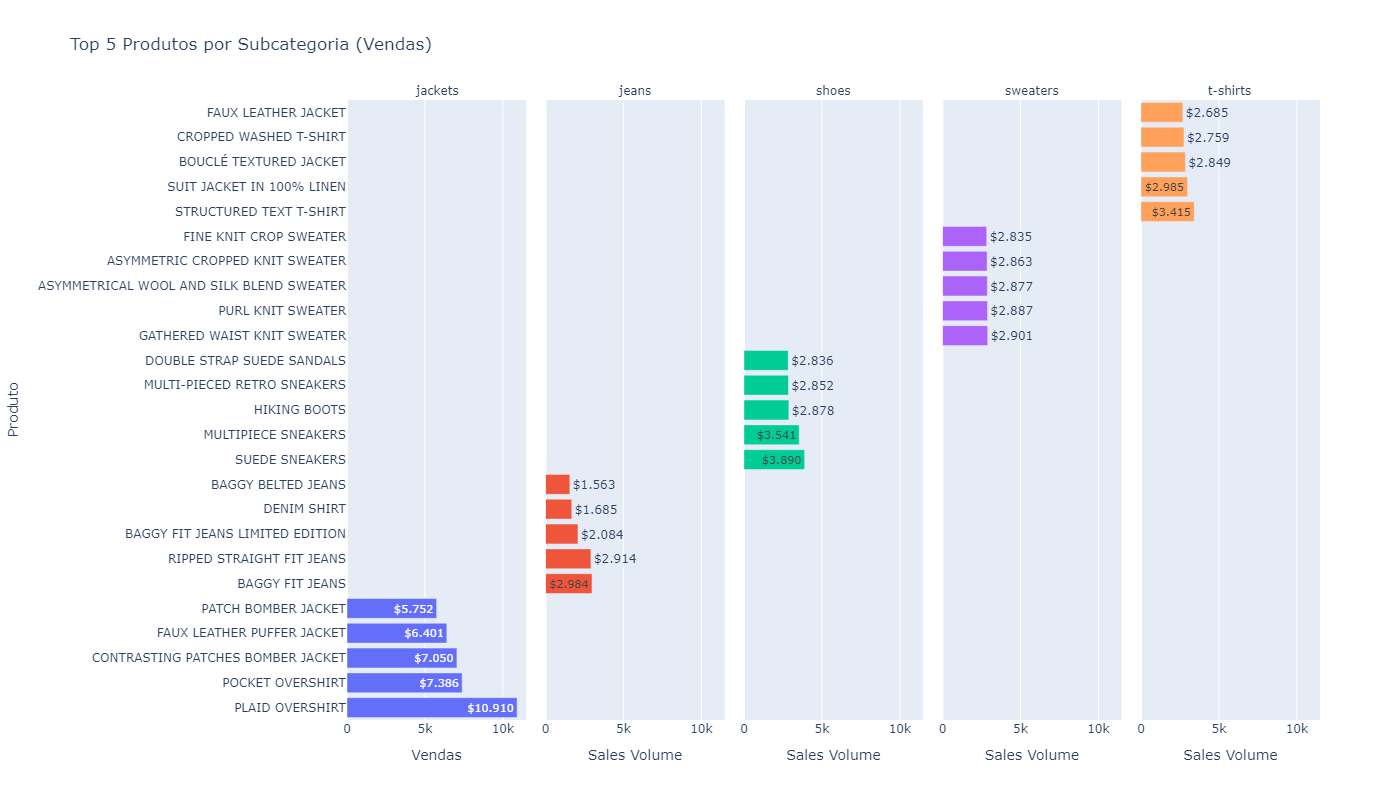

In [82]:
fig = px.bar(
    top5_produtos_subcategorias_vendas,
    x='Sales Volume',
    y='name',
    facet_col='terms',
    orientation='h',
    color='terms',
    title='Top 5 Produtos por Subcategoria (Vendas)',
    text=top5_produtos_subcategorias_vendas['Sales Volume'].apply(lambda x: f'${x:,.0f}'.replace(',','.'))
)

fig.update_layout(
    height=800,
    width=1400,
    showlegend=False,
    yaxis_title='Produto',
    xaxis_title='Vendas'
)
fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))  # Limpa texto do título das facetas
fig.show(renderer="png")

## Posição do Produto na Loja X Gênero (Vendas)

In [83]:
genero_masc = df[df['section'] == 'MAN']
#obtendo valores para a seção masculina
posicao_produto_genero = genero_masc[['Product Position', 'section', 'Sales Volume']].groupby(['Product Position', 'section']).sum().reset_index().sort_values('Sales Volume', ascending=False)

posicao_produto_genero_format = posicao_produto_genero.copy()
#formatando padrão numérico
posicao_produto_genero_format['Sales Volume'] = posicao_produto_genero['Sales Volume'].apply(lambda x: f'{x:,.0f}').replace(',','.')
display(posicao_produto_genero_format)

print('')

genero_fem = df[df['section'] == 'WOMAN']
#obtendo valores para a seção masculina
posicao_produto_genero_fem = genero_fem[['Product Position', 'section', 'Sales Volume']].groupby(['Product Position', 'section']).sum().reset_index().sort_values('Sales Volume', ascending=False)

posicao_produto_genero_fem_format = posicao_produto_genero_fem.copy()
#formatando padrão numérico
posicao_produto_genero_fem_format['Sales Volume'] = posicao_produto_genero_fem['Sales Volume'].apply(lambda x: f'{x:,.0f}').replace(',','.')
display(posicao_produto_genero_fem_format)

,Product Position,section,Sales Volume
0,Aisle,MAN,"160,038"
1,End-cap,MAN,"128,891"
2,Front of Store,MAN,"107,270"


,Product Position,section,Sales Volume
1,End-cap,WOMAN,"24,039"
2,Front of Store,WOMAN,"21,977"
0,Aisle,WOMAN,"17,358"


## 📉 Comparação: Volume de Vendas x Faturamento

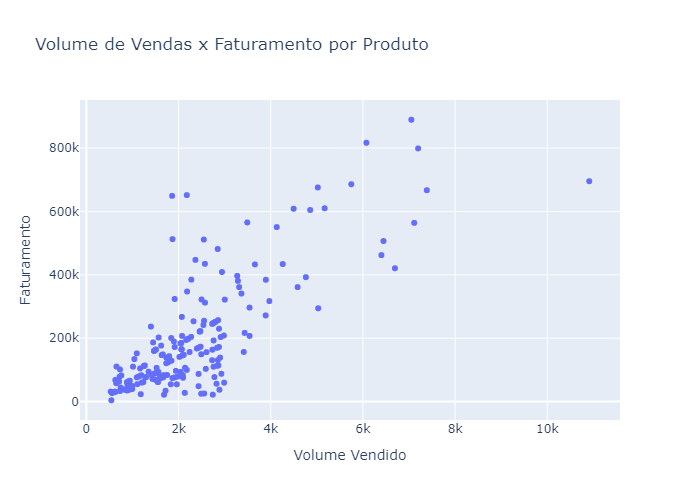

In [84]:
df_produto = df.groupby('name').agg({'Sales Volume':'sum', 'Total price':'sum'}).reset_index()
fig = px.scatter(df_produto, x='Sales Volume', y='Total price', hover_name='name', title='Volume de Vendas x Faturamento por Produto', labels={'Sales Volume':'Volume Vendido', 'Total price':'Faturamento'})
fig.show(renderer="png")


## ✅ Conclusões

- O produto "PLAID OVERSHIRT" foi o mais vendido em `volume`.
- O produto "CONTRASTING PATCHES BOMBER JACKET" foi o mais vendido em `faturamento`.
- A seção masculina apresentou um faturamento total de `$35,712,663.03`, superando em impressionantes `990.58%` o faturamento da seção feminina, que foi de `$3,275,813.45`.
- Os produtos posicionados no corredor (Aisle) são os que mais faturam, gerando um total de `$15,481,438.43`.
- A subcategoria das jaquetas apresentou um faturamento de `$$26,581,815.87`, superando em impressionantes `68.2%` o faturamento das demais subcategorias.
- O gênero `masculino` realizou `mais compras em produtos posicionados em corredores`, enquanto o gênero `feminino` em `produtos posicionados aos finais de corredores`.

- Os produtos mais vendidos em volume nem sempre são os que mais faturam.
- Algumas subcategorias são responsáveis por uma grande parte da receita total.
- Produtos de maior valor unitário contribuem significativamente, mesmo com volume de vendas menor.
- O ticket médio ajuda a identificar produtos premium.

